In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from lmfit import Model

In [2]:
# Specify the path of the files
laserPath = '/home/marteswong/CCD/Laser/'
# laserPath = '/home/marteswong/CCD/Gaussian beam/'

In [3]:
# Not used
r_pix = [146, 160, 157, 168, 187, 188, 199, 192]
r_all_pix = [179, 223, 255, 310, 373, 405, 429, 443, 503, 499, 553]
z = [5, 10, 18, 26, 34, 42, 50, 60, 70, 80, 90]


Text(0, 0.5, 'beam diameter')

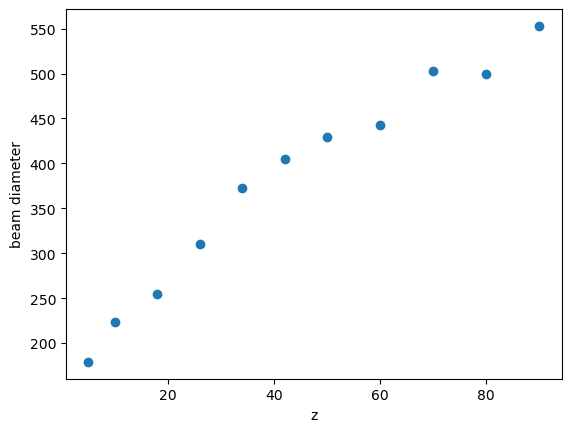

In [17]:
# Not used
# Plot the beam diameter vs the distance from the laser
plt.plot(z,r_all_pix,'o')
plt.xlabel('z')
plt.ylabel('beam diameter')

## Gaussian Fit to find out the beam radius(in x-dir(horizontal))

In [4]:
# Histogram for each beam

# Read in the files
size = '4'
# '{}cm_0.dat'.format(size)
data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
data_array = np.array(data_df)

#Convert the value from hex to dec
beam_dec = np.zeros(data_array.shape)

for i in range(len(data_array)):
    for j in range(len(data_array[i])-1):
        t = data_array[i][j]
        d = int(str(t), base=16)
        beam_dec[i][j] = d

# Get the brightest pixel and let it be the centre
maxindex = beam_dec.argmax()
(row, col) = np.unravel_index(beam_dec.argmax(), beam_dec.shape)   # (423, 498)   (row, column)
print(row)

/tmp/ipykernel_24864/3826088418.py:6: DtypeWarning: Columns (453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')


549


1281


Text(0, 0.5, 'Intensity')

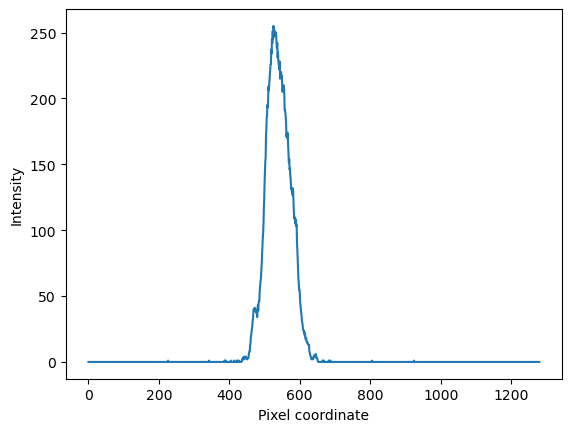

In [4]:
# Plot the intensity along the brightest pixel(in horizontal direction)
beam_1d = beam_dec[row]
print(beam_1d.shape[0])
x = np.arange(1281)
plt.plot(x, beam_1d, '-')
plt.xlabel('Pixel coordinate')
plt.ylabel('Intensity')
# plt.title("Plot of intensity along a horizontal line")


537.4884033612175
[[ 3.33924766e+00  2.93038533e-07 -3.09705611e-01]
 [ 2.93038533e-07  8.61725088e-02 -7.53373496e-08]
 [-3.09705611e-01 -7.53373496e-08  8.61727579e-02]]
34.13648643849893


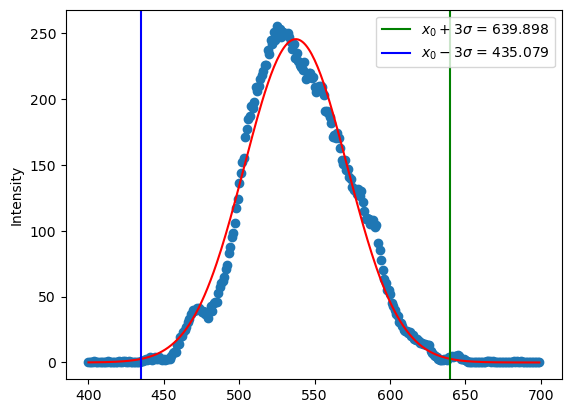

In [5]:
# Fit a Gaussian curve to the intensity profile of the laser beam
# To obtain the beam diameter
def Gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x = np.arange(400,700)
parameters, covariance = curve_fit(Gauss, x, beam_1d[400:700], p0 = (250, 530, 50),check_finite = True, method = 'lm')
print(parameters[1])
print(covariance)

plt.plot(x, beam_1d[400:700], 'o')
plt.ylabel('Intensity')

beam_fit = Gauss(x, parameters[0], parameters[1], parameters[2])
# print(beam_1d[400:700])
# print(beam_fit)
plt.plot(x, beam_fit, c='r')
# plt.xlim(400,700)
# plt.ylim(0,20)

# Store the fitted parameters into variables
(A, x0, sigma) = parameters
print(sigma)

# Choose the beam diameter as the size of the beam with x+-3*sigma intensity level(99.7% of all emitted light)
plt.axvline(x=(x0+3*sigma), c='g', label = "$x_0+3\sigma$ = {:.3f}".format(x0+3*sigma))
plt.axvline(x=(x0-3*sigma), c='b', label = "$x_0-3\sigma$ = {:.3f}".format(x0-3*sigma))
plt.legend()


/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


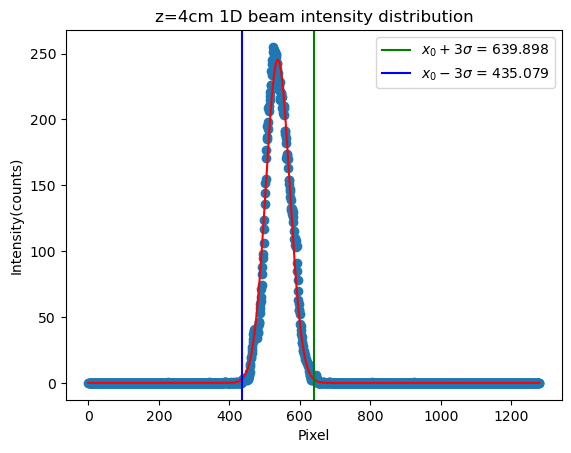

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (318,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
The PostScript backend does not support t

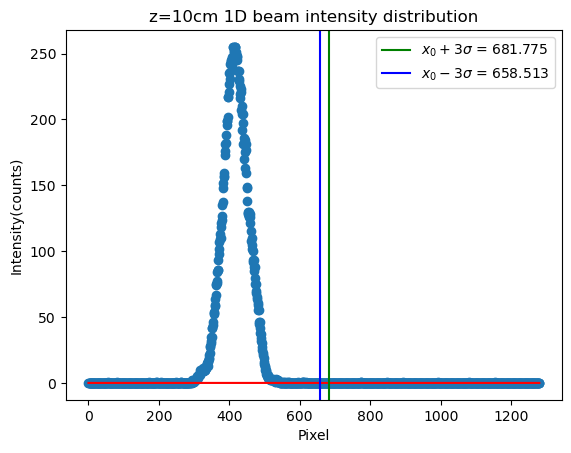

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (417,419,420,421,422,423,623,624,625,626,627,628,629,630,631,632,633) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


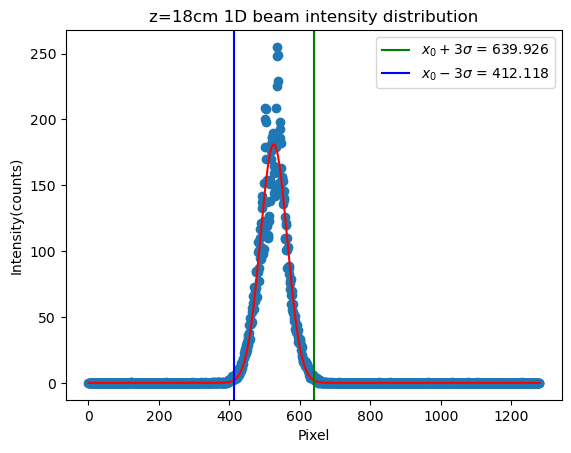

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747) have mixed types. Specify dty

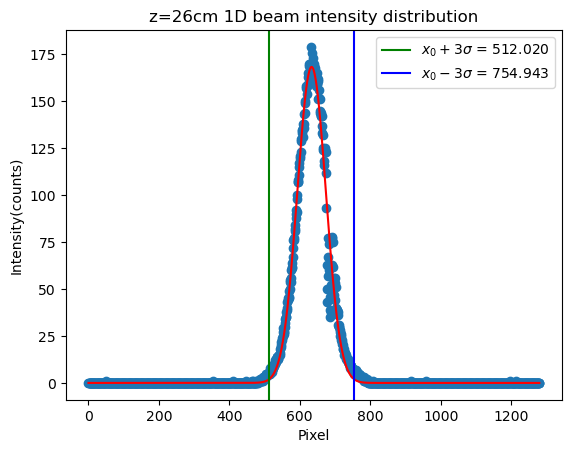

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,40

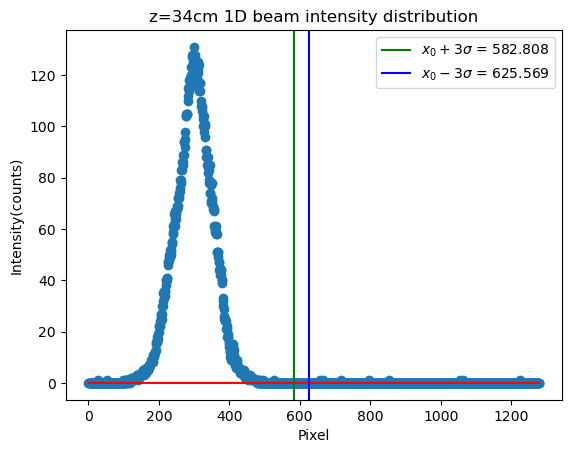

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,80

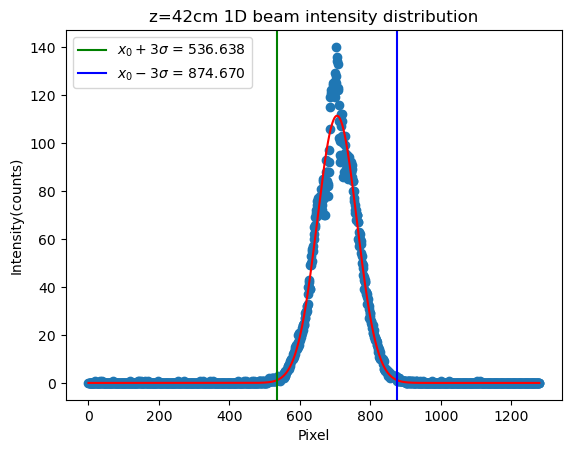

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,95

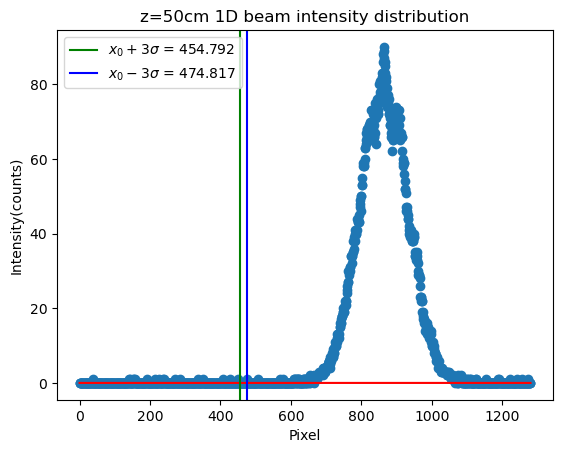

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,77

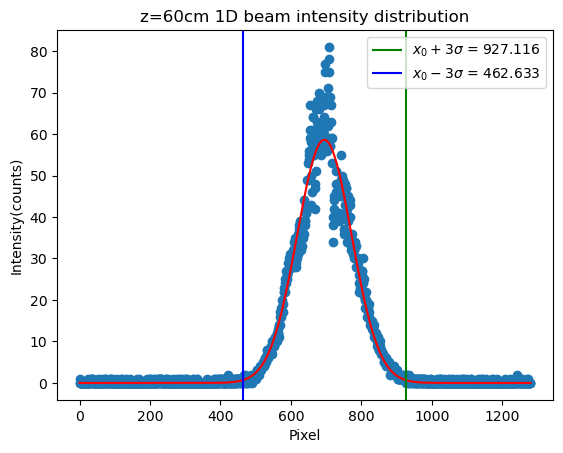

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (440,442,443,444,445,446,447,448,449,450,451,452,453,454,763,765,767,768,769,770,771,772,773,774,775,777,778) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


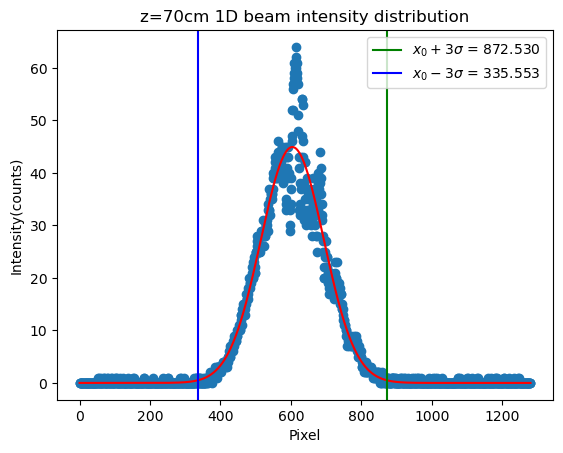

/tmp/ipykernel_24864/4012635810.py:10: DtypeWarning: Columns (93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,

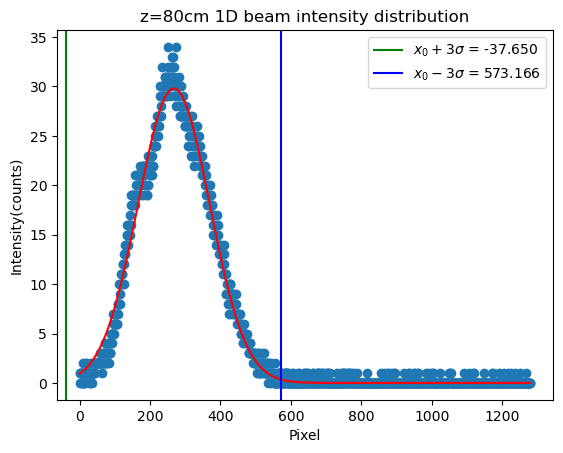

In [20]:
# Loop the Gaussian fitting for all sizes

def Gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

sizes = [4, 10, 18, 26, 34, 42, 50, 60, 70, 80]
beam_size_pix = []

for size in sizes:
    data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
    data_array = np.array(data_df)

    # Convert the value from hex to dec
    beam_dec = np.zeros(data_array.shape)

    for i in range(len(data_array)):
        for j in range(len(data_array[i])-1):
            t = data_array[i][j]
            d = int(str(t), base=16)
            beam_dec[i][j] = d

    # Get the max. intensity and extract that row for fitting the beam radius
    maxindex = beam_dec.argmax()
    (row, col) = np.unravel_index(beam_dec.argmax(), beam_dec.shape) 

    beam_1d = beam_dec[row]
    # print(beam_1d.shape[0])

    x = np.arange(beam_1d.shape[0])
    parameters, covariance = curve_fit(Gauss, x, beam_1d, p0 = (250, 530, 50),check_finite = True, method = 'lm')
    # print(parameters[1])
    # print(covariance)

    plt.plot(x, beam_1d, 'o')
    plt.xlabel('Pixel')
    plt.ylabel('Intensity(counts)')

    beam_fit = Gauss(x, parameters[0], parameters[1], parameters[2])
    # print(beam_1d[400:700])
    # print(beam_fit)
    plt.plot(x, beam_fit, c='r')
    # plt.xlim(400,700)
    # plt.ylim(0,20)

    (A, x0, sigma) = parameters
    # print(sigma)
    beam_size_pix.append(math.ceil(abs(6*sigma)))    # Round up the beam size
    plt.axvline(x=(x0+3*sigma), c='g', label = "$x_0+3\sigma$ = {:.3f}".format(x0+3*sigma))
    plt.axvline(x=(x0-3*sigma), c='b', label = "$x_0-3\sigma$ = {:.3f}".format(x0-3*sigma))
    plt.legend()
    plt.title("z={}cm 1D beam intensity distribution".format(size))

    # plt.savefig(laserPath + "{}_fit.eps".format(size))
    plt.show()

In [21]:
# The beam size(in pix unit) of each z
print(beam_size_pix)
print(sizes.index(34))

[205, 24, 228, 243, 43, 339, 21, 465, 537, 611]
4


/tmp/ipykernel_24864/937884127.py:6: DtypeWarning: Columns (716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,

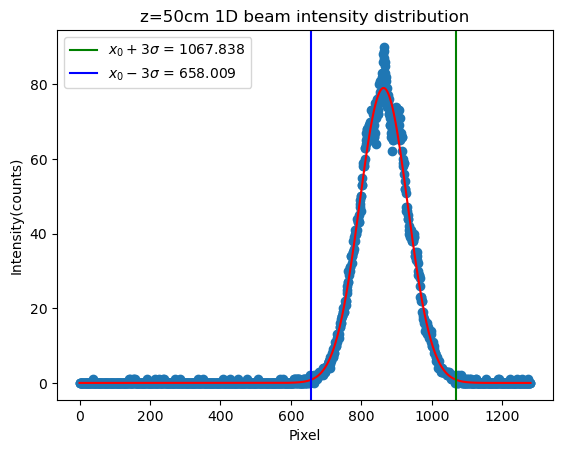

In [24]:
# Manually twerk the fitting parameters for problematic fits
# Problematic fits: 10, 34, 50

size = 50

data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
data_array = np.array(data_df)

# Convert the value from hex to dec
beam_dec = np.zeros(data_array.shape)

for i in range(len(data_array)):
    for j in range(len(data_array[i])-1):
        t = data_array[i][j]
        d = int(str(t), base=16)
        beam_dec[i][j] = d

# Get the max. intensity and extract that row for fitting the beam radius
maxindex = beam_dec.argmax()
(row, col) = np.unravel_index(beam_dec.argmax(), beam_dec.shape) 

beam_1d = beam_dec[row]
# print(beam_1d.shape[0])

x = np.arange(beam_1d.shape[0])
parameters, covariance = curve_fit(Gauss, x, beam_1d, p0 = (250, 400, 50), check_finite = True, method = 'lm')
# print(parameters[1])
# print(covariance)

plt.plot(x, beam_1d, 'o')
plt.xlabel('Pixel')
plt.ylabel('Intensity(counts)')

beam_fit = Gauss(x, parameters[0], parameters[1], parameters[2])
# print(beam_1d[400:700])
# print(beam_fit)
plt.plot(x, beam_fit, c='r')
# plt.xlim(400,700)
# plt.ylim(0,20)

(A, x0, sigma) = parameters
# print(sigma)
beam_size_pix[sizes.index(size)] = math.ceil(abs(6*sigma))   # Round up the beam size
plt.axvline(x=(x0+3*sigma), c='g', label = "$x_0+3\sigma$ = {:.3f}".format(x0+3*sigma))
plt.axvline(x=(x0-3*sigma), c='b', label = "$x_0-3\sigma$ = {:.3f}".format(x0-3*sigma))
plt.legend()
plt.title("z={}cm 1D beam intensity distribution".format(size))
# plt.show()

plt.savefig(laserPath + "{}_fit.eps".format(size))


In [26]:
# Corrected beam size(in pix unit) for all z
# a pixel is 3.75 mu m * 3.75 mu m

# Beam diameter from the laser manual: 0.48mm(p.129)

print(beam_size_pix)    # [205, 210, 228, 243, 307, 339, 410, 465, 537, 611]
beam_size = list(map(lambda x: x * 3.75e-6 ,  beam_size_pix))   # This is the beam diameter
print(beam_size)

[205, 210, 228, 243, 307, 339, 410, 465, 537, 611]
[0.00076875, 0.0007875, 0.0008550000000000001, 0.0009112500000000001, 0.00115125, 0.00127125, 0.0015375, 0.00174375, 0.00201375, 0.00229125]


Text(0.5, 1.0, 'Plot of beam diameter against the distance to the laser source')

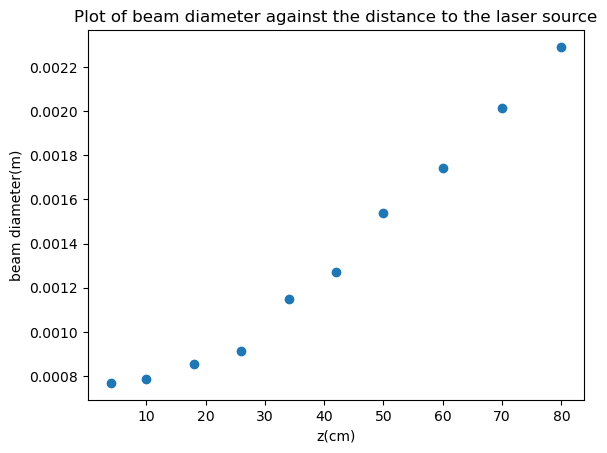

In [17]:
# Plot the beam sizes vs distance to laser
z = sizes
plt.plot(z,beam_size,'o')
plt.xlabel('z(cm)')
plt.ylabel('beam diameter(m)')
plt.title("Plot of beam diameter against the distance to the laser source")

In [18]:
print(632e-9)
z = np.array(sizes)/100
beam_rad = list(map(lambda x: x * 3.75e-6 / 2,  beam_size_pix))   # This is the beam radius
print(z)
print(beam_rad)

6.32e-07
[0.04 0.1  0.18 0.26 0.34 0.42 0.5  0.6  0.7  0.8 ]
[0.000384375, 0.00039375, 0.00042750000000000004, 0.00045562500000000003, 0.000575625, 0.000635625, 0.00076875, 0.000871875, 0.001006875, 0.001145625]


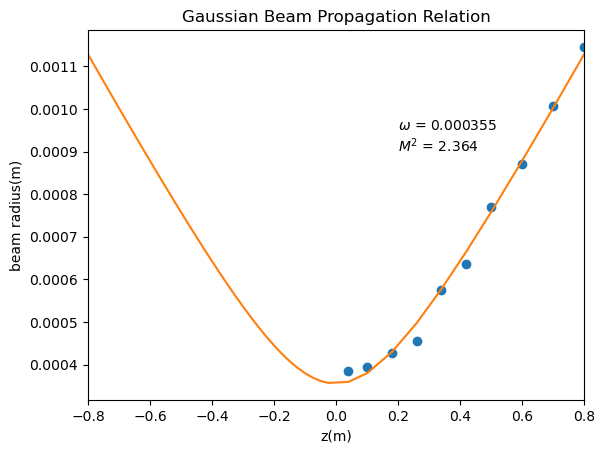

In [33]:
def func(z, M, w_0):
    wvl = 632e-9
    z = np.array(z)
    w = w_0*pow((1+(wvl*(z)*(M**2)/math.pi/w_0**2)**2),0.5)
    return w

# Convert the distance(z) from cm to m
z = np.array(sizes)/100

params, covar = curve_fit(func, z, beam_rad, p0 = (480, 5), check_finite = True)

(M, w_0) = params


z_fitted = np.linspace(-0.8,-0.025,32)
z_fitted = np.concatenate((z_fitted, np.array(z)))

w_fitted = func(z_fitted, M, w_0)

plt.plot(z, beam_rad, 'o')

plt.plot(z_fitted, w_fitted, label = "fitted curve")

plt.xlabel('z(m)')
plt.ylabel('beam radius(m)')
plt.title("Gaussian Beam Propagation Relation")
plt.text(0.2,0.0009,"$\omega$ = {:.6f}\n$M^2$ = {:.3f}".format(w_0, M**2))

plt.xlim([-0.8, 0.8])
# plt.savefig(laserPath + "laser profile.eps")


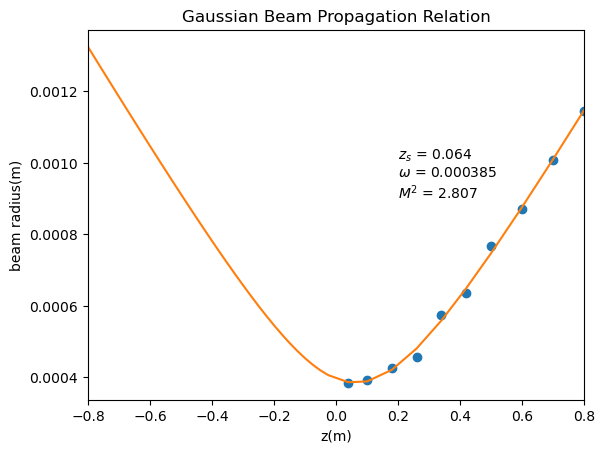

In [40]:
def func1(z, z_s, M, w_0):
    wvl = 632e-9
    z = np.array(z)
    w = w_0*pow((1+(wvl*(z-z_s)*(M**2)/math.pi/w_0**2)**2),0.5)
    return w

# Convert the distance(z) from cm to m
z = np.array(sizes)/100

params, covar = curve_fit(func1, z, beam_rad, p0 = (0.01, 480, 5), check_finite = True)

(z_s, M, w_0) = params


z_fitted = np.linspace(-0.8,-0.025,32)
z_fitted = np.concatenate((z_fitted, np.array(z)))

w_fitted = func1(z_fitted,z_s, M, w_0)

plt.plot(z, beam_rad, 'o')

plt.plot(z_fitted, w_fitted, label = "fitted curve")

plt.xlabel('z(m)')
plt.ylabel('beam radius(m)')
plt.title("Gaussian Beam Propagation Relation")
plt.text(0.2,0.0009,"$z_s$ = {:.3f}\n$\omega$ = {:.6f}\n$M^2$ = {:.3f}".format(z_s, w_0, M**2))

plt.xlim([-0.8, 0.8])
plt.savefig(laserPath + "laserProfileReal.eps")

In [24]:
# Print out the fitted parameters
print(M**2)     # 2.3636095550373843
print(w_0)      # 0.36 mm
# print(z_fitted)

2.3636095550373843
0.0003552724321964947


/tmp/ipykernel_12334/18934805.py:7: DtypeWarning: Columns (453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,483,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')


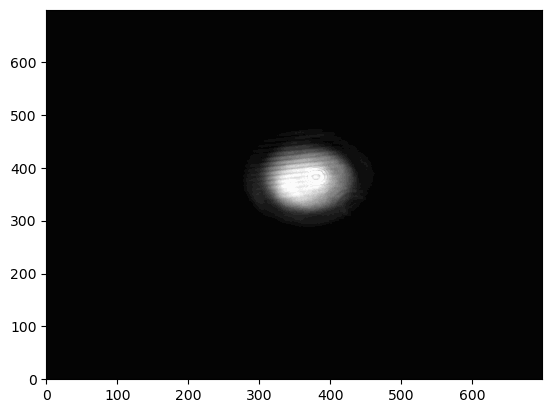

In [17]:
## Trial
# plot 3d graph, beam size(x,y) with distance(z) 

# Read in the files
size = '4'
# '{}cm_0.dat'.format(size)
data_df = pd.read_csv(laserPath + '{}cm_0.dat'.format(size), delimiter=' ')
data_array = np.array(data_df)

#Convert the value from hex to dec
beam_dec = np.zeros(data_array.shape)

for i in range(len(data_array)):
    for j in range(len(data_array[i])-1):
        t = data_array[i][j]
        d = int(str(t), base=16)
        beam_dec[i][j] = d

# locate the central max. pixel
maxindex = beam_dec.argmax()
(max_row, max_col) = np.unravel_index(beam_dec.argmax(), beam_dec.shape)   # (423, 498)   (row, column)

# Cut out 700*700 pixel^2 box for each beam, centered at the brightest pixel
beam_box = beam_dec[(max_row-350):(max_row+350), (max_col-350):(max_col+350)]

x_pos = np.arange(700)
y_pos = np.arange(700)
plt.contourf(x_pos, y_pos, beam_box, 25, cmap = "gray")


In [28]:
# Percentage error of the beam radius
r_theo = 0.24
r_exp = 0.385
err = (r_exp-r_theo)/r_theo *100
print(err)

60.41666666666667
